## Tensor basics

Source:https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

### What is a tensor?

<div>
<img src="https://i.redd.it/zmnq16y5hw381.png" width="350" height="400"/>
</div>

Tensors are a specialized data structure that are **very similar to arrays and matrices**. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Let's go through some of the basics of tensors 😉


### Tensors creation and initialization

In [1]:
# Importing libraries and setting device

import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
# From standard python types

one_dimensional_list = [1, 2, 3, 4]
two_dimensional_list = [[1,2], [3,4], [5,6]]

one_dimensional_tensor_from_list = torch.tensor(one_dimensional_list)
two_dimensional_tensor_from_list = torch.tensor(two_dimensional_list)
print(one_dimensional_tensor_from_list, "\n", two_dimensional_tensor_from_list, "\n")

one_dimensional_tuple = (1,2,3,4)
two_dimensional_tuple = ((1,2), (3,4), (5,6))

one_dimensional_tensor_from_tuple = torch.tensor(one_dimensional_tuple)
two_dimensional_tensor_from_tuple = torch.tensor(two_dimensional_tuple)
print(one_dimensional_tensor_from_tuple, "\n", two_dimensional_tensor_from_tuple, "\n")

tensor([1, 2, 3, 4]) 
 tensor([[1, 2],
        [3, 4],
        [5, 6]]) 

tensor([1, 2, 3, 4]) 
 tensor([[1, 2],
        [3, 4],
        [5, 6]]) 



In [3]:
# From numpy ndarrays

# TIP: being explicit is better!
np_array = np.array([[1,2], [3,4], [5,6]])

two_dimensional_tensor_from_np_array_a = torch.tensor(np_array) #implicit cast
print(two_dimensional_tensor_from_np_array_a, "\n")

two_dimensional_tensor_from_np_array_b = torch.from_numpy(np_array) #explicit conversion
print(two_dimensional_tensor_from_np_array_b, "\n")

tensor([[1, 2],
        [3, 4],
        [5, 6]]) 

tensor([[1, 2],
        [3, 4],
        [5, 6]]) 



In [4]:
# From other tensors

print(two_dimensional_tensor_from_np_array_a, "\n")

new_tensor = torch.ones_like(two_dimensional_tensor_from_np_array_a) #same with torch.zeros_like()
print(new_tensor, "\n")

new_tensor = torch.rand_like(two_dimensional_tensor_from_np_array_a, dtype=torch.float)
print(new_tensor, "\n")

tensor([[1, 2],
        [3, 4],
        [5, 6]]) 

tensor([[1, 1],
        [1, 1],
        [1, 1]]) 

tensor([[0.6544, 0.3800],
        [0.1131, 0.2214],
        [0.9927, 0.3718]]) 



In [5]:
# With random or constant values

shape = (2,3) #shape can be a tuple
random_tensor = torch.rand(shape)
print(random_tensor, "\n")

shape = [2, 3] #shape can be a list
ones_tensor = torch.ones(shape)
print(ones_tensor, "\n")

zeros_tensor = torch.zeros(shape)
print(zeros_tensor, "\n")

shape = [[2,3],[2,3]] #shape cannot be a multi-dimensional list!
try:
  zeros_tensor = torch.zeros(shape)
except TypeError as te:
  print(te)



tensor([[0.1229, 0.8420, 0.2862],
        [0.6064, 0.1870, 0.6453]]) 

tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

zeros(): argument 'size' (position 1) must be tuple of ints, but found element of type list at pos 0


In [6]:
# Be careful!
# torch.tensor != torch.Tensor
# see: https://discuss.pytorch.org/t/difference-between-torch-tensor-and-torch-tensor/106816/4

a = torch.tensor(2) #create tensor from input
b = torch.Tensor(2) #create un-initialised tensor of two elements
print(a, b)

a = torch.Tensor() #ok!
print(a, "\n")

try:
  b = torch.tensor() #error!
except TypeError as te:
  print(te)

a = torch.tensor([1,2])
b = torch.Tensor([1,2]) #internally casts as float!
print(a, b)


tensor(2) tensor([3.1382e+12, 3.2894e-41])
tensor([]) 

tensor() missing 1 required positional arguments: "data"
tensor([1, 2]) tensor([1., 2.])


### Tensor attributes

In [7]:
# Basic tensor attributes

tensor = torch.rand(3,4)
print(tensor, "\n")

# shape
print(f"Shape of tensor: {tensor.shape}")

# dtype
print(f"Datatype of tensor: {tensor.dtype}")

#device
print(f"Device tensor is stored on: {tensor.device}")

tensor([[0.9822, 0.4493, 0.7408, 0.7619],
        [0.7334, 0.8853, 0.2400, 0.6332],
        [0.6285, 0.8299, 0.9621, 0.4045]]) 

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
# Importance of dtype

# specifying the dtype will force a cast in the specified dtype
# the dtype is best specified using torch.dtype, e.g. torch.float32
# all info at: https://pytorch.org/docs/stable/tensor_attributes.html#torch.dtype

a = torch.tensor([1, 2, 3], dtype=torch.float32) #casts to float
print(a)

b = torch.tensor([1, 2, 3], dtype=torch.int64) #casts to int
print(b)

tensor([1., 2., 3.])
tensor([1, 2, 3])


In [9]:
# Sometimes casting will have unexpected results
c = torch.tensor([0, 2, 3], dtype=torch.bool) #conversion to bool is always true unless the input is 0!
print(c)

tensor([False,  True,  True])


In [10]:
# Different dtypes will have different precisions

# TIP: precision can matter! be careful...
d = torch.tensor([1.2561312312312313, 3.0, 4], dtype=torch.double) #casts to double/float64
print(d)

e = torch.tensor([1.2561312312312313, 3.0, 4], dtype=torch.float32) #casts to float
print(e)

print(d == e)

tensor([1.2561, 3.0000, 4.0000], dtype=torch.float64)
tensor([1.2561, 3.0000, 4.0000])
tensor([False,  True,  True])


### Tensor operations

For a complete list of operations, see https://pytorch.org/docs/stable/torch.html

This operations include (but are not limited to):
- stacking and concatenating tensors (e.g. concatenate, stack, vstack, hstack...)
- replicating tensor dimensions (e.g. repeat)
- matrix multiplications (bmm, mm, etc)

And so on...


In [11]:
# Moving tensor to gpu (when available)

tensor = torch.tensor([1, 2, 3])
multi_dimensional_tensor = torch.tensor([[1,2],[3,4]])

if torch.cuda.is_available():
  tensor = tensor.to(device)
  multi_dimensional_tensor = multi_dimensional_tensor.to(device)
  print(f"Tensors stored on: {tensor.device} and {multi_dimensional_tensor.device}")

In [12]:
# Indexing and slicing

print(tensor, "\n")

n = tensor[1]
print(n, "\n")

print(multi_dimensional_tensor, "\n")

n = multi_dimensional_tensor[1,1]
print(n, "\n")

n = multi_dimensional_tensor[:,1]
print(n, "\n")

n = multi_dimensional_tensor[1,:]
print(n, "\n")

tensor([1, 2, 3]) 

tensor(2) 

tensor([[1, 2],
        [3, 4]]) 

tensor(4) 

tensor([2, 4]) 

tensor([3, 4]) 



In [13]:
# More advanced slicing

print(multi_dimensional_tensor, "\n")

# slicing with ellipsis
n = multi_dimensional_tensor[1, ...]
print(n)

# will this work?
# try to guess...and then uncomment
# n = multi_dimensional_tensor[..., 1, :, ...]

# ranged slicing
big_tensor = torch.rand(100)
indexes = range(0, big_tensor.shape[0], 25)
n = big_tensor[indexes]
print(n, "\n")

# multidimensional ranged_slicing
big_tensor = torch.rand(100, 90)
indexes_a = range(0, big_tensor.shape[0], 25)
indexes_b = range(0, big_tensor.shape[1], 30)
n = big_tensor[indexes_a][:, indexes_b]
print(n.shape, "\n", n, "\n")

tensor([[1, 2],
        [3, 4]]) 

tensor([3, 4])
tensor([0.1877, 0.2131, 0.1009, 0.1666]) 

torch.Size([4, 3]) 
 tensor([[0.4705, 0.7633, 0.9667],
        [0.6733, 0.1942, 0.4804],
        [0.4002, 0.3804, 0.1156],
        [0.4143, 0.6471, 0.9513]]) 



In [14]:
# In place operations

# In place operations are marked with an underscore at the end
# They require less memory but will cause issues with backpropagation
# so their use is generally not recommended if you need gradients.

tensor = torch.zeros(10)
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


### Numpy bridging

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n} \n")

t.add_(1)
print(f"t: {t}")
print(f"n: {n} \n")

# the opposite is also true, i.e. when creating a tensor with torch.from_numpy
# to avoid sharing memory between two variables, create a copy!
# this is necessary if for instance you need to log something that
# also is part of a gradient computation

t = torch.ones(5)
print(f"With cloning: \n t: {t}")
n = torch.from_numpy(t.clone().numpy()) #NOTE: fix add .cpu() if the tensors are on the GPU!
print(f"n: {n} \n")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.] 

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.] 

With cloning: 
 t: tensor([1., 1., 1., 1., 1.])
n: tensor([1., 1., 1., 1., 1.]) 

t: tensor([2., 2., 2., 2., 2.])
n: tensor([1., 1., 1., 1., 1.])


## A gentle introduction to automatic gradients

Source: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

### What is autograd?

<div>
<img src="https://drive.google.com/uc?export=view&id=1-uEz6hkaeOl70KqDhnmpJmJKrXEfcsQf" width="500" height="450">
</div>

Backpropagation is the process that we use to optimize neural networks.
Doing it manually is very complex and would be unfeasible for very large networks.

Luckily, torch's **autograd** implementation will handle most of the complexity for us!

But what are we backpropagating through?

<details>
The computational graph!
</details>



### How does autograd work

Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. This is called a **computation graph**.

In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

  - run the requested operation to compute a resulting tensor, and

  - maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

  - computes the gradients from each .grad_fn (functions participating in the gradients computation),

  - accumulates them in the respective tensor’s .grad attribute, and

  - using the chain rule, propagates all the way to the leaf tensors.


Let's see this in practice with a visual explanation, computing the DAG of the following expression: $Q = 3a^3 - b^2$. Assume that $a, b$ are two tensors, and that we want to compute their gradient w.r.t to $Q$.

**NOTE**: In this example $Q$ is a vector resulting from the above expression. Most of the time, you'll deal with expressions that have a single scalar as output, such as a loss function.

Below is a visual representation of the DAG of this expression. In the graph, the arrows are in the direction of the forward pass. The nodes represent the backward functions of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors a and b.

<div>
<img src="https://pytorch.org/tutorials/_images/dag_autograd.png" width="400" height="400"/>
</div>



In [16]:
device = "cpu" #this tutorial only works on cpu!

# let's the elements of our expression

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

# and compute it

Q = 3*a**3 - b**2

### Computing gradient manually

Let's manually compute the gradient for this expression and see if it matches with autograd's computation:
- for $a$ the $\frac{\partial Q }{\partial a}$ is $9a^2$
- for $b$ the $\frac{\partial Q }{\partial b}$ is $-2b$.

In this case, the gradient should be
- $9 \cdot [2,3]^2 = 9 \cdot [4, 9] = [36, 81]$
- $-2 \cdot [6,4] = [-12, -8]$

Let's verify it with code!

In [17]:
try:
  grad = Q.backward()
except RuntimeError as rt:
  print(rt)

grad can be implicitly created only for scalar outputs


Oops! Unless $Q$ is a scalar, we need to explicitly pass a gradient argument in `Q.backward()` because it is a vector. `gradient` is a tensor of the same shape as $Q$, and it represents the gradient of $Q$ w.r.t. itself, i.e. $\frac{\partial Q}{\partial Q} = 1$

In [18]:
external_grad = torch.tensor([1. , 1.])
Q.backward(gradient=external_grad)
print(f"Gradient of Q w.r.t Q is {external_grad}")

Gradient of Q w.r.t Q is tensor([1., 1.])


We can now manually verify that the gradients of $a$ and $b$ match!

In [19]:
print(a.grad)
print(a.grad == 9*a**2, "\n")
print(b.grad)
print(b.grad == -2*b)

tensor([36., 81.])
tensor([True, True]) 

tensor([-12.,  -8.])
tensor([True, True])


Mh...what if we called `backward()` on Q  a second time? What would happen?

In [20]:
try:
  Q.backward(gradient=external_grad)
except RuntimeError as rt:
  print(rt)


Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


### Dynamic DAG

In pytorch the graph is recreated **from scratch**; after each .backward() call, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.

In addition to that, saved intermediate values of the graph are freed when you call `.backward()` or `autograd.grad()`. Specify `retain_graph=True` if you need to backward through the graph a second time or if you need to access saved tensors after calling `backward()`.

### Excluding elements from the DAG

`torch.autograd` tracks operations on all tensors which have their `requires_grad` flag set to `True`. For tensors that don’t require gradients, setting this attribute to `False` excludes it from the gradient computation DAG.

The output tensor of an operation will require gradients even if only a single input tensor has `requires_grad=True`

You also have the option of using `with torch.no_grad()`, as everything under its scope will automatically disable gradient computation (even if `requires_grad=True` for some variables).

But why would we want avoid tracking gradients?

<details>
  <ul>
    <li>"freeze" part of a model, for example for finetuing just a classification layer;</li>
    <li>reduce autograd's computations (although this is a lot more uncommon)</li>
  </ul>
</details>

In [21]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


## Your first neural network

<div>
<img src="https://i.kym-cdn.com/entries/icons/original/000/039/408/cover10.jpg" width="800" height="400"/>
</div>


### Creating a NN from scratch

In this part of the notebook, we'll create a small neural network, similar to the one in this image:

<div>
<img src="https://pytorch.org/tutorials/_images/mnist.png" width="800" height="200"/>
</div>

It is a simple feed-forward network. It takes the input, feeds it through several layers one after the other, and then finally gives the output.
To create it, we'll leverage the `torch.nn`package.

### Network

In [22]:
# Define network

# let's create our toy network
# as with every base torch model
# it will be an extension of the torch.nn.Module class
# see doc here: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

# we'll have to define an __init__ function and the forward function as well

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 32 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(64 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 3 input image channel, 32 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 32, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 32, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 32 input channels, 64 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 64, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 64, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
# let's count how many trainable parameters we have

count = 0
for n, p in net.named_parameters():
  print(n, p.shape, "\n")
  count += p.numel() if p.requires_grad else 0

print(f"Total number of trainable parameters: {count} \n")

# to return the learnable parameters, we can use .parameters()
# we'll see later how this comes in handy
params = list(net.parameters())


conv1.weight torch.Size([32, 3, 5, 5]) 

conv1.bias torch.Size([32]) 

conv2.weight torch.Size([64, 32, 5, 5]) 

conv2.bias torch.Size([64]) 

fc1.weight torch.Size([120, 1600]) 

fc1.bias torch.Size([120]) 

fc2.weight torch.Size([84, 120]) 

fc2.bias torch.Size([84]) 

fc3.weight torch.Size([10, 84]) 

fc3.bias torch.Size([10]) 

Total number of trainable parameters: 256830 



In [24]:
# finally, let's see our network in action!

input = torch.rand(1, 3, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0579,  0.0078, -0.0111,  0.0232, -0.0404,  0.0441,  0.0268,  0.0171,
         -0.0346,  0.1015]], grad_fn=<AddmmBackward0>)


### Loss function and optimizer

Once we have our model, we'll have to define an appropriate **loss function** to train the network.

We'll also have to define an **optimizer**, to tune the network's parameters w.r.t. our loss function, and feed the network `parameters()` to the it.

We can pick both from torch's vast library:
- loss functions at https://pytorch.org/docs/stable/nn.html#loss-functions
- optimizers at https://pytorch.org/docs/stable/optim.html

Since we are dealing with a classification problem, we'll choose:
<details>
  <ul>
    <li> crossentropy as the loss function</li>
    <li> adam as the optimizer</li>
  </ul>
</details>

In [25]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001) #many optimizers out there, but remember: start easy!

print(f"Loss function is {loss_fn} \n Optimizer is {optimizer}")

Loss function is CrossEntropyLoss() 
 Optimizer is Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


### Gathering the data

The dataset that we'll use to train our model is **CIFAR10**. It's a very popular dataset, comprising 10 classes of 3x32x32 images.

While it's possible to download and create the dataset class from scratch, we can speed things up using the `torchvison` package. It includes most of the more popular datasets.

In case you need to create and visualize a dataset from scratch, you can refer to this tutorial: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html.

We'll now load the dataset, and then apply the transforms from `torchvision.transforms` to normalize and convert the images into tensors. Note that `torchvision` datasets will save data as `pillow` images by default.

In [41]:
import torchvision
import torchvision.transforms as T
from torchvision.datasets import CIFAR10

transforms = T.Compose([
    T.RandomApply([
        T.RandomGrayscale(p=0.25)
    ]),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) #use Compose to concatenate multiple transforms

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transforms)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transforms)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


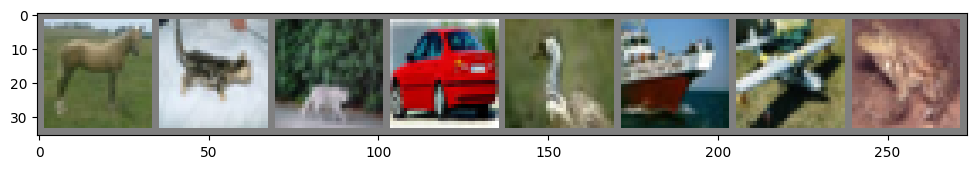

horse  cat    cat    car    bird   ship   plane  frog   


In [42]:
# to make loading data easier, we'll create a dataloader using
# torch.utils.data.Dataloader

batch_size = 512
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# let's visualize our data
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,4))

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:8]))
# print labels
print(''.join(f'{classes[labels[j]]:5s}  ' for j in range(8)))


### Training loop

Now that we have a model, an optimizer and some data that we can use to train it, let's define a training loop.

A basic training loop is composed as follows: for each epoch, we'll iterate on each mini-batch and perform:
- a forward pass on the data
- the loss computation
- backpropagation
- **optional**: validation

Before proceeding, we have to move everything to the GPU. Doing so will significantly speed up training.

In [43]:
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# move model to GPU
net.to(device)
net.train() #switch to train mode

num_epochs = 10
for epoch in range(num_epochs):  # loop over the dataset multiple times
  print(f"Current epoch is {epoch} \n")
  running_loss = 0.0
  count = 0
  for data in tqdm(trainloader, position=0, leave=True):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    inputs = inputs.to(device) #move to GPU
    labels = labels.to(device) #move to GPU

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    count+=1

  print(f"Running loss for epoch {epoch} is {running_loss / count}")

print('Finished Training')

Using cpu device
Current epoch is 0 



100%|██████████| 98/98 [00:31<00:00,  3.16it/s]


Running loss for epoch 0 is 0.8293757949556623
Current epoch is 1 



100%|██████████| 98/98 [00:30<00:00,  3.19it/s]


Running loss for epoch 1 is 0.8316246508335581
Current epoch is 2 



100%|██████████| 98/98 [00:38<00:00,  2.56it/s]


Running loss for epoch 2 is 0.8275134958782975
Current epoch is 3 



100%|██████████| 98/98 [00:30<00:00,  3.21it/s]


Running loss for epoch 3 is 0.827918429155739
Current epoch is 4 



100%|██████████| 98/98 [00:34<00:00,  2.84it/s]


Running loss for epoch 4 is 0.8274822904139149
Current epoch is 5 



100%|██████████| 98/98 [00:36<00:00,  2.70it/s]


Running loss for epoch 5 is 0.8279711081057178
Current epoch is 6 



100%|██████████| 98/98 [00:37<00:00,  2.62it/s]


Running loss for epoch 6 is 0.8291060079117211
Current epoch is 7 



100%|██████████| 98/98 [00:36<00:00,  2.71it/s]


Running loss for epoch 7 is 0.8286910391583735
Current epoch is 8 



100%|██████████| 98/98 [00:36<00:00,  2.69it/s]


Running loss for epoch 8 is 0.830183387410884
Current epoch is 9 



100%|██████████| 98/98 [00:33<00:00,  2.93it/s]

Running loss for epoch 9 is 0.829774050688257
Finished Training


In [44]:
# let's save the model we just trained
# and load it back again
# this is just to show how to save and reload a model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))
net.eval() #switch to eval mode

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Testing the model

We can finally test the model we just trained on the test dataset. We'll inspect performance on the whole test set and also on each class, to identify the ones where the network has struggled.

In [45]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest probability is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 66 %


In [46]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 72.6 %
Accuracy for class: car   is 84.9 %
Accuracy for class: bird  is 46.3 %
Accuracy for class: cat   is 42.0 %
Accuracy for class: deer  is 59.0 %
Accuracy for class: dog   is 67.5 %
Accuracy for class: frog  is 78.8 %
Accuracy for class: horse is 77.6 %
Accuracy for class: ship  is 65.8 %
Accuracy for class: truck is 73.5 %


## Congratulations!

You just trained your very first basic network! In the next lab, we'll go through some more advanced topics, inlcuding loggin, automatic training/validation/testing, using SOTA models and the very basics of model tuning.

<div>
<img src="https://drive.google.com/uc?export=view&id=12bo7doNOi1MQKy6G0u13b7lBVKVfL8w1" width="500" height="450">
</div>

<small> (Yes, generative models still struggle with text) </small>

<small> If you need anything else, feel free to shot me an email at:
gioia@diag.uniroma1.it with the prefix [AML]. </small>
